In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

In [2]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

/home/admin/anaconda3/envs/kitchen/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.6' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
cohort = "test1"

data_method = "test1_data"
eval_method = "test1_eval"

scene = "mid_gate"

courses = ["traverse"]   

roster = [
    "clanGhostBear",
    "clanJadeFalcon",
    "clanNovaCat",
    "clanWolf",
    # "Iceman",
    # "hsDavion",
    # "hsKurita",
    # "hsLiao",
    # "hsMarik",
    ]

In [ ]:
# Generate Rollouts
rg.generate_rollout_data(cohort,courses,scene,data_method)

# Review the Rollout Data
ps.plot_rollout_data(cohort)

In [ ]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

Generating observation data with subsample ratio 1.0 for...
 Cohort : test1
 Roster : ['clanGhostBear', 'clanJadeFalcon', 'clanNovaCat', 'clanWolf']
 Courses: ['traverse']

Output()

======================================================================
Cohort : test1          Network: histNet
======================================================================
----------------------------------------------------------------------
Student: clanJadeFalcon | Epochs: 200   | Data Size: 15000.0/2100.0               
Time: 0h 10m 10s    | Train: 0.6908 | Test: 0.8223
----------------------------------------------------------------------
Student: clanNovaCat | Epochs: 200   | Data Size: 15000.0/2100.0               
Time: 0h 10m 18s    | Train: 0.5980 | Test: 0.8218
----------------------------------------------------------------------
Student: clanWolf   | Epochs: 200   | Data Size: 15000.0/2100.0               
Time: 0h 9m 45s     | Train: 0.6517 | Test: 0.8298
----------------------------------------------------------------------
Student: Iceman     | Epochs: 300   | Data Size: 15000.0/2100.0               
Time: 0h 5m 42s     | Train: 0.5816 | Test: 0.6365
======================================================================

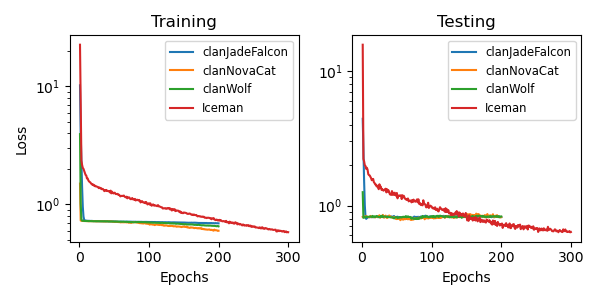

In [ ]:
# Train the Policy
tp.train_roster(cohort,roster,"histNet",50)

pl.plot_losses(cohort,roster,"histNet",use_log=True)

In [ ]:
# # Train the Policy
# # tp.train_roster(cohort,roster,"commNet",150)
# tp.train_roster(cohort,roster,"commNet",500,
#                 use_deploy=scene,deploy_method=eval_method,lim_sv=50)

pl.plot_losses(cohort,roster,"commNet",use_log=True)

In [ ]:
# Simulate in FiGS
for course in courses:
    df.deploy_roster(cohort,course,scene,eval_method,roster,mode="visualize")
    pl.plot_deployments(cohort,course,roster,plot_show=True)